## <b> Projeto Final

### Proposta: </b> Analise e  Identificação de padrões socioeconomicos e saúde,  dos municipios brasileiros no tratamento de  pacientes com cancer de mama. 
### Método: Agrupamento -  Clustering 

### Disciplina : IBI5031 - Aprendizagem de Máquina para Bioinformática

### Etapa 1 : Clustering

In [1]:
# Docente: Marcelo da Silva Reis
# Programa: Pós - Graduação Interunidades em Bioinformática da USP
# Alunos: Bruna Ferreira dos Santos e Guilherme

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans #para usar o KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [3]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [4]:
caminho = '/content/drive/MyDrive/4. Mestrado/3_Material de Aula/IBI5031_202002_IME_Aprendizado_Maquina/Projeto/Code/data/dados_saida/'

## <b>0. Leitura da Base preparada em etapa anterior</b>

In [5]:
df_original = pd.read_csv(caminho+"base_cancer_mama_socioeconomicas_normal.csv")
# Definindo indices
df_original = df_original.set_index(['cod_mun','municipio','uf'])
df_original.head()

,,,populacao,pib,idh,idhm_renda,idhm_educa,idhm_longev,eletivo_qtd_inter,urgencia_qtd_inter,outros_qtd_inter,efetivo_valor_inter,urgencia_valor_inter,outros_valor_inter,risco_sim,risco_nao,risco_indef,risco_ignorado,exam_anterior_sim,exam_anterior_nao,exam_anterior_ig,idade_menor_20,idade_20_40,idade_41_54,idade_maior_55,idade_ig,nod_mama_dir_sim,nod_mama_dir_esq,nod_2_mamas,nod_nao,nod_tam_menor_10,nod_tam_11_20,nod_tam_21_50,nod_tam_maior_50,nod_tam_ig,mamog_ante_sim,mamog_ante_sim.1,mamog_ante_desc,ind_clin_mamog_diag,ind_clin_mamog_rast,mama_esq_densa,mama_esq_adiposa,...,malig_indet_ig,susp_malig_lesao_epi,susp_malig_lesao_outros,susp_malig_ig,nodulo_solido,nodulo_solido_cistico,nodulo_cistico,nodulo_ignorado,mortes_tumores,modal_terap_cirurgia,modal_terap_quimio,modal_terap_radio,modal_terap_ambos,unid_universitaria,unid_esc_sup_isolada,unid_aux_ensino,unid_sem_ativ_ensino,hospital_ensino,academia_saude,casf,centro_hemoterapia,caps,centro_parto_normal,ubs,ambul_espec,consultorio,farmacia,hosp_especializado,hosp_geral,lacen,lab_pub,policlinica,posto_saude,pa,ps_esp,ps_geral,sec_saude,home_care,unid_diag_terapia,estab_saude_total
cod_mun,municipio,uf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
110001,alta floresta d'oeste,ro,22728,499306.0,0.641,0.763,0.526,0.657,94.0,1952.0,0.0,536.70,309.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,1.0,0.0,0.0,2.0,0.0,14.0,2.0,1.0,2.0,0.0,37.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,13.0,83.0
110002,ariquemes,ro,109523,2463773.0,0.702,0.806,0.600,0.716,217.0,5549.0,0.0,1010.18,743.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,353.0,0.0,0.0,1.0,7.0,2.0,0.0,71.0,66.0,10.0,3.0,8.0,93.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,7.0,73.0,357.0
110003,cabixi,ro,5188,140502.0,0.650,0.757,0.559,0.650,266.0,0.0,0.0,303.11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
110004,cacoal,ro,85893,2180454.0,0.718,0.821,0.620,0.727,10573.0,2998.0,0.0,943.75,422.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.0,60.0,251.0,117.0,21.0,0.0,0.0,41.0,461.0,0.0,0.0,0.0,7.0,3.0,0.0,64.0,116.0,21.0,38.0,0.0,97.0,0.0,0.0,3.0,0.0,0.0,0.0,13.0,3.0,0.0,133.0,502.0
110005,cerejeiras,ro,16204,472179.0,0.692,0.799,0.602,0.688,2.0,1198.0,0.0,542.80,383.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,69.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,11.0,0.0,6.0,0.0,15.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,14.0,78.0


In [6]:
df = pd.read_csv(caminho+"base_cancer_mama_socioeconomicas_scaled.csv")
# Definindo indices
df = df.set_index(['cod_mun','municipio','uf'])
df.head()

,,,populacao,pib,idh,idhm_renda,idhm_educa,idhm_longev,eletivo_qtd_inter,urgencia_qtd_inter,outros_qtd_inter,efetivo_valor_inter,urgencia_valor_inter,outros_valor_inter,risco_sim,risco_nao,risco_indef,risco_ignorado,exam_anterior_sim,exam_anterior_nao,exam_anterior_ig,idade_menor_20,idade_20_40,idade_41_54,idade_maior_55,idade_ig,nod_mama_dir_sim,nod_mama_dir_esq,nod_2_mamas,nod_nao,nod_tam_menor_10,nod_tam_11_20,nod_tam_21_50,nod_tam_maior_50,nod_tam_ig,mamog_ante_sim,mamog_ante_sim.1,mamog_ante_desc,ind_clin_mamog_diag,ind_clin_mamog_rast,mama_esq_densa,mama_esq_adiposa,...,malig_indet_ig,susp_malig_lesao_epi,susp_malig_lesao_outros,susp_malig_ig,nodulo_solido,nodulo_solido_cistico,nodulo_cistico,nodulo_ignorado,mortes_tumores,modal_terap_cirurgia,modal_terap_quimio,modal_terap_radio,modal_terap_ambos,unid_universitaria,unid_esc_sup_isolada,unid_aux_ensino,unid_sem_ativ_ensino,hospital_ensino,academia_saude,casf,centro_hemoterapia,caps,centro_parto_normal,ubs,ambul_espec,consultorio,farmacia,hosp_especializado,hosp_geral,lacen,lab_pub,policlinica,posto_saude,pa,ps_esp,ps_geral,sec_saude,home_care,unid_diag_terapia,estab_saude_total
cod_mun,municipio,uf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
110001,alta floresta d'oeste,ro,0.001781,0.000699,0.502252,0.409910,0.516181,0.523422,0.000411,0.004429,0.0,0.012773,0.018944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000709,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.002988,0.0,0.012821,0.000000,0.000000,0.007194,0.0,0.002688,0.000257,0.000146,0.052632,0.000000,0.008184,0.0,0.0,0.000000,0.008130,0.00,0.0,0.000000,0.027027,0.000000,0.004332,0.002676
110002,ariquemes,ro,0.008824,0.003447,0.639640,0.603604,0.635922,0.643585,0.000948,0.012591,0.0,0.024041,0.045556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002885,0.000000,0.000000,0.000000,0.000000,0.0,0.019802,0.000000,0.012707,0.0,0.000000,0.012346,0.106061,0.007194,0.0,0.013633,0.008493,0.001457,0.078947,0.006656,0.020571,0.0,0.0,0.000969,0.000000,0.01,0.0,0.000000,0.000000,0.127273,0.024325,0.011511
110003,cabixi,ro,0.000358,0.000197,0.522523,0.382883,0.569579,0.509165,0.001162,0.000000,0.0,0.007214,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000202,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001404,0.0,0.012821,0.012346,0.000000,0.000000,0.0,0.000576,0.000000,0.000000,0.026316,0.000000,0.000000,0.0,0.0,0.000000,0.028455,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.001258
110004,cacoal,ro,0.006906,0.003051,0.675676,0.671171,0.668285,0.665988,0.046173,0.006803,0.0,0.022460,0.025929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013061,0.011774,0.036366,0.043031,0.117978,0.0,0.000000,0.019683,0.016594,0.0,0.000000,0.000000,0.106061,0.010791,0.0,0.012289,0.014927,0.003060,1.000000,0.000000,0.021455,0.0,0.0,0.002907,0.000000,0.00,0.0,0.059091,0.081081,0.000000,0.044319,0.016187
110005,cerejeiras,ro,0.001252,0.000661,0.617117,0.572072,0.639159,0.586558,0.000009,0.002718,0.0,0.012918,0.023493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000405,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.004321,0.002484,0.0,0.000000,0.000000,0.000000,0.003597,0.0,0.004800,0.001416,0.000000,0.157895,0.000000,0.003318,0.0,0.0,0.000000,0.008130,0.00,0.0,0.000000,0.027027,0.000000,0.004665,0.002515


## 1.  Separando conjunto de dados

In [7]:
from sklearn.model_selection import train_test_split
train=df.copy()

## 2. Método do Cotovelo : Número ideal de clusters 

In [8]:
def metodo_cotovelo(data,n):
    erro = []
    for n in range(2, n):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        erro.append(kmeans.inertia_)
    plt.figure(figsize=(8,5))
    plt.plot(range(1,n), erro)
    plt.xlabel("Número de clusters")
    plt.ylabel("Soma dos erros")
    plt.title(" Quantidade de clusters")
    plt.show()

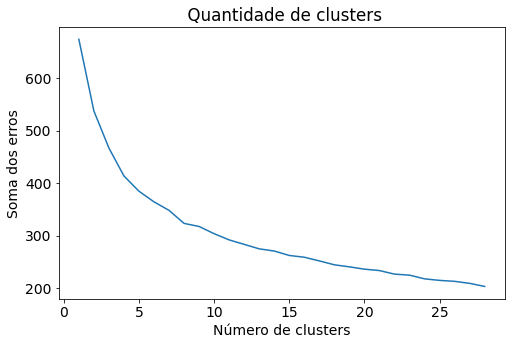

In [9]:
metodo_cotovelo(train,30)

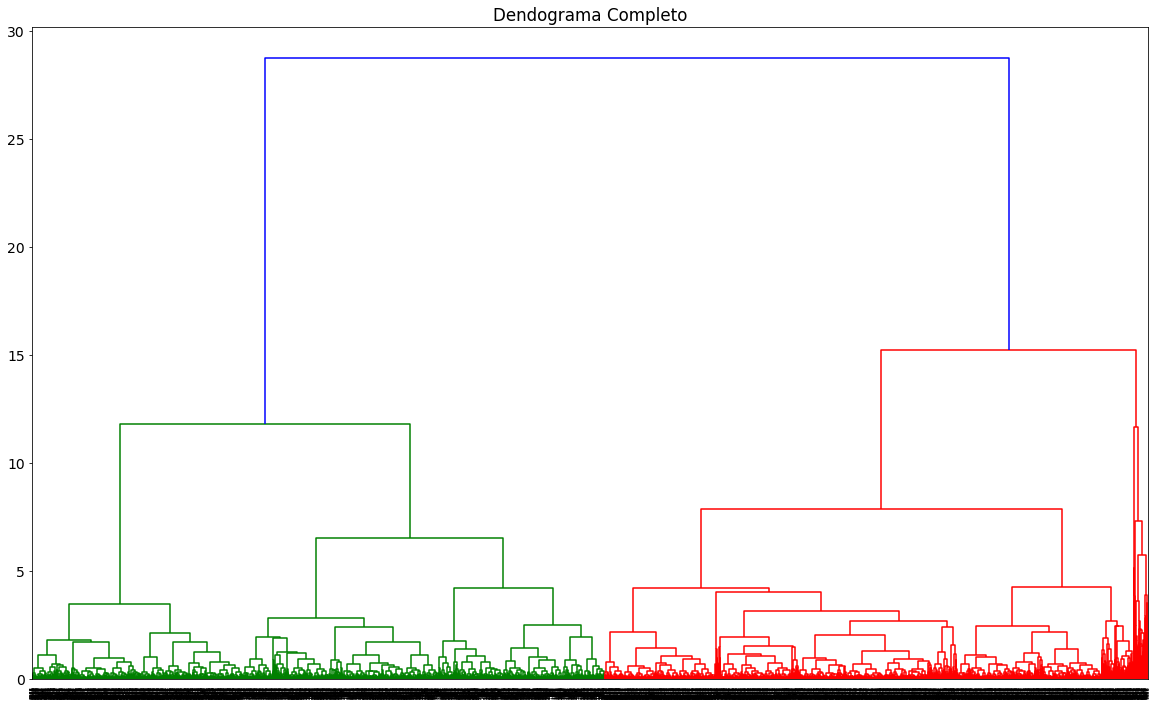

In [10]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 12))
plt.title("Dendograma Completo")
dend = shc.dendrogram(shc.linkage(train, method='ward'))

## 3. Algoritmo de agrupamento k-médias (k-means)

#### Inicialização do algoritmo K-means

In [11]:
kmeans = KMeans(n_clusters  = 5, random_state = 0)

#### Ajuste do algoritmo aos dados de treinamento

In [12]:
# Algoritmo aprende padrões encontrados nos dados
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### Centroides geradas pelo algoritmo

In [13]:
#Centroides geradas pelo Algoritmo
kmeans.cluster_centers_

array([[ 1.36633681e-03,  2.71445652e-04,  3.58621234e-01,
         3.58061460e-01,  4.20290042e-01,  3.08722161e-01,
         3.16058730e-04,  1.09133717e-03,  2.52312694e-05,
         3.01306202e-03,  1.39918598e-02,  3.94667209e-04,
         7.79984916e-04,  1.92757081e-03,  1.84985284e-03,
         6.38842898e-04,  1.45693123e-03,  2.54637807e-03,
         1.22912288e-03,  5.36486501e-04,  1.43118176e-03,
         2.16669661e-03,  1.99679006e-03, -1.60461922e-17,
         1.38149732e-03,  1.39269301e-03,  1.56791341e-03,
         2.10448897e-03,  7.14715508e-04,  1.05945904e-03,
         9.69954790e-04,  3.56717001e-04,  2.29734737e-03,
         1.68515819e-03,  3.20976057e-03,  1.57820399e-03,
         7.83475927e-05,  2.25113776e-03,  2.38186933e-03,
         2.06233228e-03,  1.31750980e-03,  1.55213772e-03,
         6.89697981e-06,  1.78510066e-05,  3.19671666e-04,
         2.35901937e-03,  2.06854132e-03,  1.31320473e-03,
         1.55135861e-03,  6.72237273e-06,  1.23504057e-0

#### Cluster previstos para cada instancia

In [14]:
# labels definidos pelo algoritmo
pred = kmeans.labels_

In [15]:
pred

array([1, 1, 1, ..., 1, 1, 3], dtype=int32)

#### Base com as informações de cluster e instancias

In [16]:
train_cluster = train.copy()
train_cluster['cluster'] = pred
df_original['cluster'] = pred
train_cluster.head()

,,,populacao,pib,idh,idhm_renda,idhm_educa,idhm_longev,eletivo_qtd_inter,urgencia_qtd_inter,outros_qtd_inter,efetivo_valor_inter,urgencia_valor_inter,outros_valor_inter,risco_sim,risco_nao,risco_indef,risco_ignorado,exam_anterior_sim,exam_anterior_nao,exam_anterior_ig,idade_menor_20,idade_20_40,idade_41_54,idade_maior_55,idade_ig,nod_mama_dir_sim,nod_mama_dir_esq,nod_2_mamas,nod_nao,nod_tam_menor_10,nod_tam_11_20,nod_tam_21_50,nod_tam_maior_50,nod_tam_ig,mamog_ante_sim,mamog_ante_sim.1,mamog_ante_desc,ind_clin_mamog_diag,ind_clin_mamog_rast,mama_esq_densa,mama_esq_adiposa,...,susp_malig_lesao_epi,susp_malig_lesao_outros,susp_malig_ig,nodulo_solido,nodulo_solido_cistico,nodulo_cistico,nodulo_ignorado,mortes_tumores,modal_terap_cirurgia,modal_terap_quimio,modal_terap_radio,modal_terap_ambos,unid_universitaria,unid_esc_sup_isolada,unid_aux_ensino,unid_sem_ativ_ensino,hospital_ensino,academia_saude,casf,centro_hemoterapia,caps,centro_parto_normal,ubs,ambul_espec,consultorio,farmacia,hosp_especializado,hosp_geral,lacen,lab_pub,policlinica,posto_saude,pa,ps_esp,ps_geral,sec_saude,home_care,unid_diag_terapia,estab_saude_total,cluster
cod_mun,municipio,uf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
110001,alta floresta d'oeste,ro,0.001781,0.000699,0.502252,0.409910,0.516181,0.523422,0.000411,0.004429,0.0,0.012773,0.018944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000709,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.002988,0.0,0.012821,0.000000,0.000000,0.007194,0.0,0.002688,0.000257,0.000146,0.052632,0.000000,0.008184,0.0,0.0,0.000000,0.008130,0.00,0.0,0.000000,0.027027,0.000000,0.004332,0.002676,1
110002,ariquemes,ro,0.008824,0.003447,0.639640,0.603604,0.635922,0.643585,0.000948,0.012591,0.0,0.024041,0.045556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002885,0.000000,0.000000,0.000000,0.000000,0.0,0.019802,0.000000,0.012707,0.0,0.000000,0.012346,0.106061,0.007194,0.0,0.013633,0.008493,0.001457,0.078947,0.006656,0.020571,0.0,0.0,0.000969,0.000000,0.01,0.0,0.000000,0.000000,0.127273,0.024325,0.011511,1
110003,cabixi,ro,0.000358,0.000197,0.522523,0.382883,0.569579,0.509165,0.001162,0.000000,0.0,0.007214,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000202,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001404,0.0,0.012821,0.012346,0.000000,0.000000,0.0,0.000576,0.000000,0.000000,0.026316,0.000000,0.000000,0.0,0.0,0.000000,0.028455,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.001258,1
110004,cacoal,ro,0.006906,0.003051,0.675676,0.671171,0.668285,0.665988,0.046173,0.006803,0.0,0.022460,0.025929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013061,0.011774,0.036366,0.043031,0.117978,0.0,0.000000,0.019683,0.016594,0.0,0.000000,0.000000,0.106061,0.010791,0.0,0.012289,0.014927,0.003060,1.000000,0.000000,0.021455,0.0,0.0,0.002907,0.000000,0.00,0.0,0.059091,0.081081,0.000000,0.044319,0.016187,4
110005,cerejeiras,ro,0.001252,0.000661,0.617117,0.572072,0.639159,0.586558,0.000009,0.002718,0.0,0.012918,0.023493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000405,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.004321,0.002484,0.0,0.000000,0.000000,0.000000,0.003597,0.0,0.004800,0.001416,0.000000,0.157895,0.000000,0.003318,0.0,0.0,0.000000,0.008130,0.00,0.0,0.000000,0.027027,0.000000,0.004665,0.002515,1


## <b> 3. Random Forest - Feature importance</b>

In [17]:
clusters = pd.get_dummies(train_cluster["cluster"],prefix='cluster')
clusters = clusters.reset_index()

In [18]:
y_0 = clusters['cluster_0']
y_1 = clusters['cluster_1']
y_2 = clusters['cluster_2']
y_3 = clusters['cluster_3']
y_4 = clusters['cluster_4']

#### <b> Grupo 0 : Feature Importance </b>

In [19]:
def variaveis_mais_importantes (train,y,n_features):
    # Separação de caracteristicas e variavel resposta (status)
    X = train
    # Variavel dependente
    y = y

    # Modelo RandomForest
    rf =  RandomForestClassifier(random_state=0, n_jobs=-1)
    
    # Train model
    model = rf.fit(X, y)
    
    # Calculate feature importances
    importantes = model.feature_importances_

    ordenacao = np.argsort(importantes)[::-1]

    print("Indices das Variaveis mais importantes")
    print(ordenacao)

    names = [X.columns[i] for i in ordenacao]

    
    variaveis = pd.DataFrame(names[:n_features])
    variaveis.columns = ['Variavel']

    return X,y,importantes,variaveis

In [20]:
X_0,y_0,importantes_0,variaveis_0 = variaveis_mais_importantes(train,y_0,20)

Indices das Variaveis mais importantes
[  5   2   3   4   1 110  36   0 123  22 101 108  33  17 124  16  93  25
 104  52  48  12 109  34   7  32  10  13 117  20  47  27  41  37  40  21
  46  18  24  57  39  53  59  38  26  45 113   9  29  55  14 121  28   6
  35 106 116  94 111  56  60 100  51 103 118  30  44  85  54 115  58  15
  73 120  64  81  31  88  19  92  11   8  99  98 112  61 105  66  62  42
  67 114  90  80  89  63 122  78  69  49 119  76 107  65 102  68  43  79
  96  50  97  91  95  70  77  71  87  23  86  84  83  72  74  75  82]


In [21]:
variaveis_0

,Variavel
0,idhm_longev
1,idh
2,idhm_renda
3,idhm_educa
4,pib
5,consultorio
6,ind_clin_mamog_diag
7,populacao
8,unid_diag_terapia
9,idade_maior_55


### Cluster 1

In [22]:
X_1,y_1,importantes_1,variaveis_1 = variaveis_mais_importantes(train,y_1,20)

Indices das Variaveis mais importantes
[  2   5   3   4   1   0 108 101 124  93 123  10 109  36  13  17   7  33
  34  57 110  37  18  46  16  53  22  59   9  20  48  55  32  45 113  47
  41  38  35  12  40  21  27  25  39  14 121   6  24  28 117  29 111 104
  26 116  94  52 106 103  30  51  44 100  56  60 115 118  58  54  88  15
  81 120  73  31  19 112  85 105  61  92   8  95  66  90  98  62  64  11
  89  99  68  80  67  65  97  42  69  49  76  43 114  96  79  50  70  78
 107 122 119  63  77  74  75 102  72  86  91  84  23  71  87  82  83]


In [23]:
variaveis_1

,Variavel
0,idh
1,idhm_longev
2,idhm_renda
3,idhm_educa
4,pib
5,populacao
6,ubs
7,unid_sem_ativ_ensino
8,estab_saude_total
9,mortes_tumores


### Cluster 2

In [24]:
X_2,y_2,importantes_2,variaveis_2 = variaveis_mais_importantes(train,y_2,20)

Indices das Variaveis mais importantes
[ 51  59  56  22  48  37  32  40 121  44  30  53  13  31  47  21  55  29
  15  33  27  12 102  84  28  89  81  90  68  66  50  60  57  71  52  14
 103 113   7  92  26  36  35  25  10  46  24   8  49  20   6   9   4   3
   2   1   5  11  45  19  43  42  41  16  39  38  17  34  23  18 124  62
  54  94  96  97  98  99 100 101 104 105 106 107 108 109 110 111 112 114
 115 116 117 118 119 120 122  95  93  58  91  61 123  63  64  65  67  69
  70  72  73  74  75  76  77  78  79  80  82  83  85  86  87  88   0]


In [25]:
variaveis_2

,Variavel
0,mama_dir_ig
1,linf_esq_n_visu
2,linf_dir_ig
3,idade_maior_55
4,mama_dir_predom_adiposa
5,ind_clin_mamog_rast
6,nod_tam_ig
7,mama_esq_predom_densa
8,sec_saude
9,mama_esq_ig


### Cluster 3

In [26]:
X_3,y_3,importantes_3,variaveis_3 = variaveis_mais_importantes(train,y_3,20)

Indices das Variaveis mais importantes
[ 13  22  27  37  33  32  21  53  59  24  93  30  48  29  44  16  12  40
  47 101  28   6 124  56   1  25  51  57 102 113  15 123  41  95  55   7
  34  92  26  81  96  20 112 105  94 108  73  86 100   0  61 109  60  45
  64  46  70 110  38   4  39  78 116  88  52  97  66  10 118 103  17  31
 106  98 122  69  85  65  80   9  89  35 117  63   5  54 115  18  58  67
   3  76 121  90   8   2  36  91 111  68  49  19 120 107  43  77  99  79
  87  14  62  42  82  72 114 119  11  23 104  75  84  50  83  71  74]


In [27]:
variaveis_3

,Variavel
0,risco_nao
1,idade_maior_55
2,nod_nao
3,ind_clin_mamog_rast
4,mamog_ante_sim
5,nod_tam_ig
6,idade_41_54
7,linf_dir_normal
8,linf_esq_n_visu
9,nod_mama_dir_sim


### Cluster 4

In [28]:
X_4,y_4,importantes_4,variaveis_4 = variaveis_mais_importantes(train,y_4,20)

Indices das Variaveis mais importantes
[  2   5   3   4   1 110 123  93  10   0  22  25 109 124  12  94  33   9
  16 101  13 108  32  21  27  37  47  20  40  34  57  53  17   6 113  24
   7  36  59  14  48  39  46 121  18  41  38  45  26  73  55 104  35  28
  88  85  29 116  30 117  52  81  61  51 111 118 106 103  44 100  56  60
  54  92  64 120  15  31 112 115  19  58  65  90  99  66  95  62 102   8
  89  49 105  68  80  96  69  11  98  42  67  50  43  97 107  70  76 122
  78  63 114 119  86  91  74  79  87  77  23  75  84  82  72  71  83]


In [29]:
variaveis_4

,Variavel
0,idh
1,idhm_longev
2,idhm_renda
3,idhm_educa
4,pib
5,consultorio
6,unid_diag_terapia
7,mortes_tumores
8,urgencia_valor_inter
9,populacao


## <b> 4. Comparando Clusters</b>

#### Principais Variaveis de cada cluster

In [30]:
variaveis = variaveis_0.copy()
variaveis.columns = ['cluster 0']
variaveis['cluster 1'] = variaveis_1['Variavel']
variaveis['cluster 2'] = variaveis_2['Variavel']
variaveis['cluster 3'] = variaveis_3['Variavel']
variaveis['cluster 4'] = variaveis_4['Variavel']
variaveis

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4
0,idhm_longev,idh,mama_dir_ig,risco_nao,idh
1,idh,idhm_longev,linf_esq_n_visu,idade_maior_55,idhm_longev
2,idhm_renda,idhm_renda,linf_dir_ig,nod_nao,idhm_renda
3,idhm_educa,idhm_educa,idade_maior_55,ind_clin_mamog_rast,idhm_educa
4,pib,pib,mama_dir_predom_adiposa,mamog_ante_sim,pib
5,consultorio,populacao,ind_clin_mamog_rast,nod_tam_ig,consultorio
6,ind_clin_mamog_diag,ubs,nod_tam_ig,idade_41_54,unid_diag_terapia
7,populacao,unid_sem_ativ_ensino,mama_esq_predom_densa,linf_dir_normal,mortes_tumores
8,unid_diag_terapia,estab_saude_total,sec_saude,linf_esq_n_visu,urgencia_valor_inter
9,idade_maior_55,mortes_tumores,mama_esq_ig,nod_mama_dir_sim,populacao


#### Média das variaveis mais importantes comparadas aos outros clusters

#### Cluster 0

In [31]:
variaveis0 = variaveis_0['Variavel'].tolist()
variaveis0.append("cluster")
variaveis0.append("uf")
visao0 = df_original.reset_index()
visao0 = visao0[variaveis0]
visao_cluster_0 = visao0.groupby(by='cluster', dropna=False).mean()
a = visao0.groupby(by='cluster', dropna=False).count()
visao_cluster_0['qtd_municipios'] = a['uf']

In [32]:
visao_cluster_0.to_csv(caminho+'visao_cluster_0.csv', encoding='utf-8', index=False)

#### Cluster 1

In [33]:
variaveis1 = variaveis_1['Variavel'].tolist()
variaveis1.append("cluster")
variaveis1.append("uf")
visao1 = df_original.reset_index()
visao1 = visao1[variaveis1]
visao_cluster_1 = visao1.groupby(by='cluster', dropna=False).mean()
a = visao1.groupby(by='cluster', dropna=False).count()
visao_cluster_1['qtd_municipios'] = a['uf']
visao_cluster_1.to_csv(caminho+'visao_cluster_1.csv', encoding='utf-8', index=False)

#### Cluster 2

In [34]:
variaveis2 = variaveis_2['Variavel'].tolist()
variaveis2.append("cluster")
variaveis2.append("uf")
visao2 = df_original.reset_index()
visao2 = visao2[variaveis2]
visao_cluster_2 = visao2.groupby(by='cluster', dropna=False).mean()
a = visao2.groupby(by='cluster', dropna=False).count()
visao_cluster_2['qtd_municipios'] = a['uf']
visao_cluster_2.to_csv(caminho+'visao_cluster_2.csv', encoding='utf-8', index=False)

#### Cluster 3

In [35]:
variaveis3 = variaveis_3['Variavel'].tolist()
variaveis3.append("cluster")
variaveis3.append("uf")
visao3 = df_original.reset_index()
visao3 = visao3[variaveis3]
visao_cluster_3 = visao3.groupby(by='cluster', dropna=False).mean()
a = visao3.groupby(by='cluster', dropna=False).count()
visao_cluster_3['qtd_municipios'] = a['uf']
visao_cluster_3.to_csv(caminho+'visao_cluster_3.csv', encoding='utf-8', index=False)

#### Cluster 4

In [36]:
variaveis4 = variaveis_4['Variavel'].tolist()
variaveis4.append("cluster")
variaveis4.append("uf")
visao4 = df_original.reset_index()
visao4 = visao4[variaveis4]
visao_cluster_4 = visao4.groupby(by='cluster', dropna=False).mean()
a = visao4.groupby(by='cluster', dropna=False).count()
visao_cluster_4['qtd_municipios'] = a['uf']
visao_cluster_4.to_csv(caminho+'visao_cluster_4.csv', encoding='utf-8', index=False)